# Guía 2

## Ejercicio 1.2
Tiro un dado 2 veces, quiero la distribución de la suma de los resultados:

$X$:"resultado del dado 1",   $Y$:"resultado del dado 2,   $W$: "suma de los dos resultados"

Hago una tabla de doble entrada donde en el interior anoto el valor de w correspondiente al par (x,y).

| y\|x | 1    | 2    | 3    | 4    | 5    | 6    |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| 2    | 3    | 4    | 5    | 6    | 7    | 8    |
| 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| 4    | 5    | 6    | 7    | 8    | 9    | 10   |
| 5    | 6    | 7    | 8    | 9    | 10   | 11   |
| 6    | 7    | 8    | 9    | 10   | 11   | 12   |


Para calcular la función de probabilidad de $W$ recuerdo que estoy en un espacio equiprobable y por lo tanto $\mathbb{P}(X=x , Y=y) = 1/36,\quad x = 1,2,...,6,\ y = 1,2,...,6$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<BarContainer object of 12 artists>

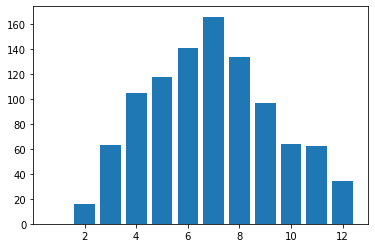

In [2]:
# simulo 1000 tiradas de un dad0 dos veces
xy = np.random.randint(1,7,size=(1000,2))  
# sumo los resultados de cada dado para generar 1000 observaciones de z
z = np.sum(xy,axis=1)

# grafico la función de proba estimada
plt.bar(np.arange(1, np.max(z)+1), np.bincount(z)[1:]) 
# bincount me cuenta cuantos caen desde 0 hasta el max valor obs del vector. Aca 0 no es un valor posible, asi que lo quito


# Ejercicio 2.2
Hallar la distribución del mínimo de $n$ v.a. exponenciales independientes de parámetro $\lambda$. 
$F_Y(y) = \mathbb{P}(Y\leq y) = \mathbb{P}(\min(X_1,\ldots,x_n) \leq y) = 1 - \mathbb{P}(\min(X_1,\ldots, x_n) > y)$ 
desde acá se puede seguir parecido al ejemplo que vimos en clase donde calculamos la distribución del máximo de uniformes. 

Se concluye que $Y\sim \exp(\lambda n)$

A continuación simulo para $\lambda = 5$ y $n=6$. Probar con distintos valores.
Bonus: que pasa si $X_i \sim \mathcal{E}(\lambda_i)$, es decir siguen siendo exponenciales independientes pero ahora de distinto parámetro

<AxesSubplot:ylabel='Density'>

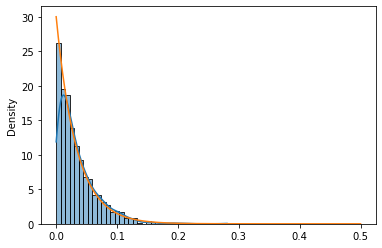

In [3]:
# genero 1000 realizaciones de 6 exponenciales de parámetro 5
x = np.random.exponential(scale=1/5, size=(1000,6))
y = np.min(x, axis=1) # calculo el mininmo de las 6 exp
sns.histplot(y, kde=True, stat='density') # grafico el hist y kde
# Y~exp(lambda*6). Superpongo la densidad verdadera y comparo
sns.lineplot(x=np.linspace(0,0.5,1000),y=stats.expon.pdf(np.linspace(0,0.5,1000), scale=1/(5*6)), color='C1') 


## Ejercicio 2.3
Tengo $X,\ Y \overset{i.i.d}{\sim} \mathcal{E}(\lambda)$ y defino $V=X+Y$, $W=X/Y$.

Luego, $g_1(x,y) = x+y$ y $g_2(x,y) = x/y$. 

Calculo las inversas:
$x = g^{-1}_1(v,w) = \frac{vw}{w+1}$, $y = g^{-1}_2(v,w) = \frac{v}{w+1}$. 

Calculo el jacobiano: $J= \left[\begin{matrix} 1 & 1 \\ 1/y & -x/y^2 \end{matrix}\right] \Rightarrow |J| = x/y^2 + 1/y = 1/y(x/y+1)$

La función de densidad de $V,W$ resulta:
$$f_{V,W}(v,w) = \left.\frac{f_{X,Y}(x,y)}{|J|}\right|_{x= \frac{vw}{w+1}, y=\frac{v}{w+1}} = $$